# RSM 6301 Group Project #1: Physical Risk Wildfire

# Data

Two historical US wildfire files from FIRMS:

   + [A] Monthly file: Wildfire_US2018Nov.csv
   + [B] Annual file: Wildfire_US2018.csv
    
An economic exposure file, available on Quercus

   + [C] gpw-v4-population-count-rev11_2020_30_sec_tif.zip
    
   + Please unzip this file and put the unzipped folder 'gpw-v4-population-count-rev11_2020_30_sec_tif' in the directory: 
    ./Users/<username>/climada/data 


# Software: 
### Instructions for the installation of the Climada package:

+ Please install the CLIMADA package by following the instructions on the website: https://climada-petals.readthedocs.io/en/stable/
+ Please follow the sections: "Advanced Instructions" and "Install CLIMADA Petals"

### Tutorial:
+ Please refer to the CLIMADA official tutorial: https://climada-petals.readthedocs.io/en/stable/tutorial/climada_hazard_Wildfire.html

### [IMPORTANT]:
+ The CLIMADA package is continuously evolving. We have corrected some bugs in the wildfire module.
+ Please replace the following two files with the ones you have downloaded from Quercus.
    + ./climada_petals/climada_petals/hazard/wildfire.py
    + ./climada_petals/climada_petals/entity/impact_funcs/wildfire.py
+ The available packages in the installed environment should suffice for this project. 
+ It is not recommended to install further packages or upgrade the existing packages. 

# Requirements
+ You are required to fill in the missing parts of the Python codes and answer the questions below.
+ Please submit the completed Jupyter Notebook file (.ipynb) on Quercus. You do not need to submit any other files.
+ Please make sure that the output results of your notebook are reproducible by running the whole notebook from the beginning to the end. To achieve this, please run the whole code from the beginning to the end again once you finish. Double check that the order of cells is correct. The TA will run your code again during marking. How can output results be non-reproducible? 
    + For example, if you run some cells in a different order, the output results may be different. 
    + If you run some cells multiple times, the output results may be different. 
+ Please use a resolution of 4 km x 4 km throughout the analysis.

# Questions

In [1]:
# Please always run this cell at the beginning of your notebook!
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # please make sure you run this line so that your results are reproducible

WF_NOV_FILE = 'Wildfire_US2018Nov.csv'
WF_YEAR_FILE = 'Wildfire_US2018.csv'
WF_RESOLUTION_KM = 4.0  # set resolution to 4 km
WF_RESOLUTION_ARCSEC = 120  # 120 arcsec ~ 4 km

# geographic boundaries for cities. format: (lon_min, lat_min, lon_max, lat_max)
GEO_BOUNDS_CITY = {'Paradise': (-121.64, 39.75, -121.58, 39.81),
              'San Jose': (-122., 37.1, -121., 38.),
              'Los Angeles': (-118.67, 33.7, -118.19, 34.34)}
GEO_BOUND_CALIFORNIA = (-124.5, 32.5, -114.1, 42)


In [2]:
from climada_petals.hazard import WildFire
from climada.hazard import Centroids
from climada.util.constants import ONE_LAT_KM
from climada.entity import ImpactFuncSet
from climada_petals.entity.impact_funcs.wildfire import ImpfWildfire
from climada.entity import LitPop
from climada.engine import Impact
from climada.engine import ImpactCalc
# You would get a FutureWarning here. You can ignore it.
# Please do not change the dependencies of CLIMADA. 
# They are very complex and may not work properly if you change them.

# Q1 Analysis of a historical single event. Please use the wildfire data in Nov 2018 in data [A] for this question.

## 1.1 How is a fire defined conceptually in CLIMADA?

Please provide your answer here:

Hint: see the tutorial https://climada-petals.readthedocs.io/en/stable/tutorial/climada_hazard_Wildfire.html
and the method set_hist_fire_FIRMS. 

## 1.2 Load the historical event data in Nov 2018 from the dataset [A]. Use CLIMADA to visualize the event data in a map. 

In [3]:
### load fires in USA Nov 2018
df_firms_nov = pd.read_csv(WF_NOV_FILE) # FIRMS data as pandas dataframe
df_firms_nov.head()

,latitude,longitude,brightness,scan,track,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,acq_date
0,33.4123,-110.8676,305.4,2.6,1.5,606,Terra,MODIS,64,6.03,280.1,42.3,N,2,2018-11-01
1,37.1644,-119.2806,314.3,1.0,1.0,607,Terra,MODIS,89,6.03,273.5,18.0,N,0,2018-11-01
2,45.8674,-121.2274,304.4,1.1,1.0,610,Terra,MODIS,60,6.03,279.0,10.7,N,0,2018-11-01
3,26.4879,-80.7354,302.3,1.1,1.0,706,Aqua,MODIS,48,6.03,290.2,7.1,N,0,2018-11-01
4,45.8697,-121.2302,306.8,1.0,1.0,1019,Aqua,MODIS,48,6.03,275.2,12.5,N,0,2018-11-01


In [4]:
df_firms_nov.index

RangeIndex(start=0, stop=5224, step=1)

In [4]:
### set up wildfire using CLIMADA. 
# this will take some time.
wf_pt = WildFire()
# set the hazard resolution to 4 km. The provided data is at 1 km. Need a scaling factor of 1/4:
res_factor = 1./WF_RESOLUTION_KM
wf_pt.set_hist_fire_FIRMS(df_firms_nov, centr_res_factor=res_factor) 
# You will see a warning if you follow the tutorial and use WildFire.set_hist_fire_FIRMS. 
# It will ask you to use WildFire.from_hist_fire_FIRMS.
# The tutorial is not updated. You can ignore the warning.
# Feel free to use either one as long as they work.
# Same for similar future warnings in later cells.

2024-06-10 16:10:38,414 - climada_petals.hazard.wildfire - WARNING - The use of WildFire.set_hist_fire_FIRMS is deprecated.Use WildFire.from_hist_fire_FIRMS .
2024-06-10 16:11:31,948 - climada.hazard.centroids.centr - INFO - Convert centroids to GeoSeries of Point shapes.


KeyboardInterrupt: 

<GeoAxes: title={'center': 'WFsingle max intensity at each point'}>

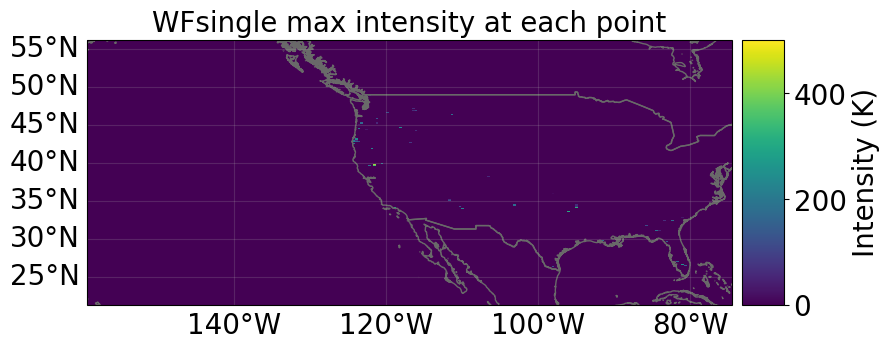

In [5]:
### visualize the event intensity in a map:
wf_pt.plot_intensity(event=0)

## 1.3 Identify the corresponding real fire event in California during the historical period. 

### 1.3.1 Which city has the highest wildfire intensity among the following cities?
 + Paradise (latitude: 39.75°N to 39.81°N; longitude: 121.58° W to 121.64° W)
 + San Jose (latitude: 37.1°N to 38°N; longitude: 121° W to 122° W)
 + Los Angeles (latitude: 33.70°N to 34.34°N; longitude: 118.19° W to 118.67° W)

In [6]:
# This function is provided for you.
def select_region(df, bound):
    """
    Select the region of interest from the dataframe.
    df: hazard dataframe
    bound: tuple in format (lon_min, lat_min, lon_max, lat_max)
    """
    return df[(df['longitude'] >= bound[0]) & 
              (df['latitude'] >= bound[1]) & 
              (df['longitude'] <= bound[2]) & 
              (df['latitude'] <= bound[3])]

In [7]:
### define resolution
# Hint: from_pnt_bounds method requires resolution in degrees.
# Hint: ONE_LAT_KM is one latitude (in degrees) to km
res_deg = WF_RESOLUTION_KM/ ONE_LAT_KM   
print(f"Resolution in degrees: {res_deg} deg")
# do a sanity check on the resolution by converting degree to km. You may use: https://www.nhc.noaa.gov/gccalc.shtml


Resolution in degrees: 0.03599712023038157 deg


In [8]:
# Hint: use the function select_region to select the region of interest.
# Hint: use the method set_hist_fire_FIRMS to set the historical fire event.
# Hint: use the method from_pnt_bounds to set the centroids.

wf_zoom_dict = {}

for cc in GEO_BOUNDS_CITY.keys():  # loop over each city
    wf_zoom = WildFire()
    centr_zoom = Centroids.from_pnt_bounds(GEO_BOUNDS_CITY.get(cc), res_deg)  # set centroids
    wf_zoom.set_hist_fire_FIRMS(df_firms_nov, centroids=centr_zoom)
    print(f"{cc}: max WF intensity: {wf_zoom.intensity.data.max()}K")
    wf_zoom_dict[cc] = wf_zoom  # append to dictionary for later use

2024-05-24 13:58:04,011 - climada_petals.hazard.wildfire - WARNING - The use of WildFire.set_hist_fire_FIRMS is deprecated.Use WildFire.from_hist_fire_FIRMS .
2024-05-24 13:58:04,202 - climada_petals.hazard.wildfire - INFO - Remaining fires to identify: 2014.
2024-05-24 13:58:06,726 - climada_petals.hazard.wildfire - INFO - Remaining fires to identify: 69.
2024-05-24 13:58:06,831 - climada_petals.hazard.wildfire - INFO - Remaining fires to identify: 0.
2024-05-24 13:58:07,501 - climada_petals.hazard.wildfire - INFO - Computing intensity of 379 fires.
2024-05-24 13:58:07,978 - climada_petals.hazard.wildfire - INFO - Returning 1 fires that impacted the defined centroids.
Paradise: max WF intensity: 446.3K
2024-05-24 13:58:07,982 - climada_petals.hazard.wildfire - WARNING - The use of WildFire.set_hist_fire_FIRMS is deprecated.Use WildFire.from_hist_fire_FIRMS .
2024-05-24 13:58:08,174 - climada_petals.hazard.wildfire - INFO - Remaining fires to identify: 2014.
2024-05-24 13:58:10,332 - c

### 1.3.2 How many longest consecutive days did the wildfire last in Nov 2018 for this city? 

In [9]:
# Hint: use the attribute date and date_end to calculate the number of consecutive days.
# Hint: There might be multiple events in the same month. 
#       Take the longest consecutive days for each city.

for cc in GEO_BOUNDS_CITY.keys():  # loop over each city
    wf_zoom = wf_zoom_dict[cc]
    date_start = wf_zoom.date
    date_end = wf_zoom.date_end
    cons_days = date_end - date_start + 1
    print(f"{cc}: longest consecutive days of fire in Nov 2018: {cons_days.max()}")

Paradise: longest consecutive days of fire in Nov 2018: 13
San Jose: longest consecutive days of fire in Nov 2018: 2
Los Angeles: longest consecutive days of fire in Nov 2018: 6


# Q2 Historical fire season analysis. Please use the yearly wildfire data in 2018 in data [B] for this question.

## 2.1 Conceptually, what is the definition of a fire season in CLIMADA?

Please provide your answer here:

Hint: read method set_hist_fire_seasons_FIRMS.

## 2.2 Visualize a fire season in a map, using the 2018 yearly historical data [B]. 

In [10]:
### load the year data
df_firms_year = pd.read_csv(WF_YEAR_FILE)
# focus on California region
df_firms_year_ca = select_region(df_firms_year, GEO_BOUND_CALIFORNIA)
df_firms_year_ca.head()

,latitude,longitude,brightness,scan,track,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,acq_date
40,38.8238,-122.6829,302.0,2.7,1.6,1946,Terra,MODIS,50,6.03,280.2,26.9,D,0,2018-01-01
41,38.8155,-122.6807,309.0,1.0,1.0,2125,Aqua,MODIS,68,6.03,284.6,9.3,D,0,2018-01-01
42,38.8140,-122.6923,304.8,1.0,1.0,2125,Aqua,MODIS,55,6.03,286.8,6.5,D,0,2018-01-01
116,32.6642,-115.0782,328.0,1.5,1.2,1852,Terra,MODIS,83,6.03,298.4,40.0,D,0,2018-01-02
117,32.6611,-115.0622,328.5,1.5,1.2,1852,Terra,MODIS,83,6.03,298.0,42.0,D,0,2018-01-02


In [11]:
### set up wildfire season using the method set_hist_fire_seasons_FIRMS
wf_year_ca = WildFire()
wf_year_ca.set_hist_fire_seasons_FIRMS(df_firms_year_ca, centr_res_factor=res_factor)
print('Events are now named according to their event year:', wf_year_ca.event_name)
print('The number of underyling events is saved as well:', wf_year_ca.n_fires)

2024-05-24 14:23:05,141 - climada_petals.hazard.wildfire - WARNING - The use of WildFire.set_hist_fire_seasons_FIRMS is deprecated.Use WildFire.from_hist_fire_seasons_FIRMS .
2024-05-24 14:23:05,142 - climada_petals.hazard.wildfire - INFO - Setting up historical fires for year set.
2024-05-24 14:23:05,171 - climada.hazard.centroids.centr - INFO - Convert centroids to GeoSeries of Point shapes.
2024-05-24 14:23:06,782 - climada_petals.hazard.wildfire - INFO - Setting up historical fire seasons 2018.
2024-05-24 14:23:09,805 - climada_petals.hazard.wildfire - WARNING - The use of WildFire.set_hist_fire_FIRMS is deprecated.Use WildFire.from_hist_fire_FIRMS .
2024-05-24 14:23:10,805 - climada_petals.hazard.wildfire - INFO - Remaining fires to identify: 21140.
2024-05-24 14:23:14,399 - climada_petals.hazard.wildfire - INFO - Remaining fires to identify: 223.
2024-05-24 14:23:14,714 - climada_petals.hazard.wildfire - INFO - Remaining fires to identify: 14.
2024-05-24 14:23:14,845 - climada_pe

<GeoAxes: title={'center': 'WFseason max intensity at each point'}>

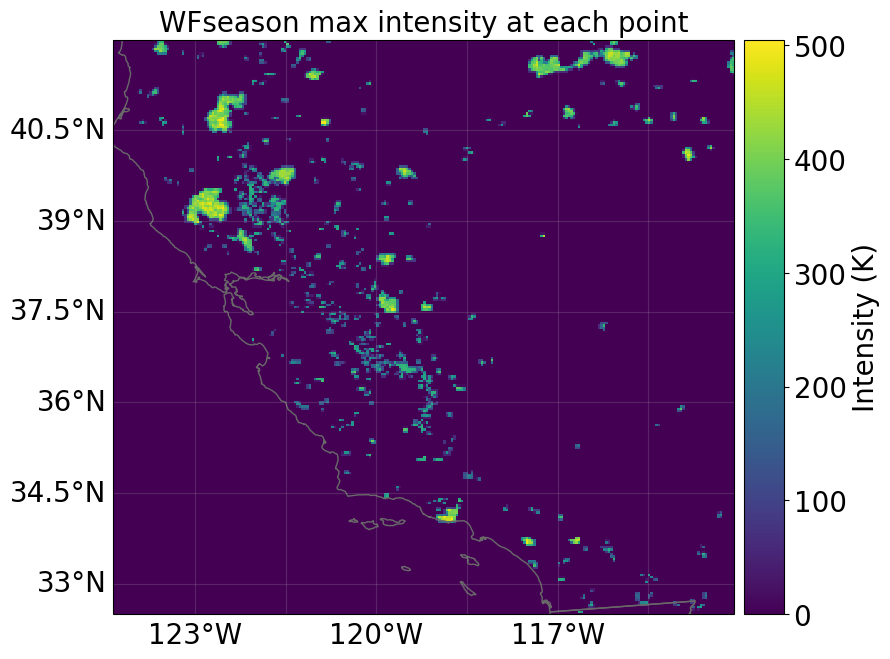

In [12]:
### visualize the fire season in a map using the method plot_intensity
wf_year_ca.plot_intensity(event=0)

## 2.3	Evaluate the loss of the 2018 fire season. Specifically,
+ Use the economic exposure from datat [C] with fin_mode 'pc' to estimate the total economic exposure. Use 2020 as the reference year for 2018 economic exposure.
+ Use the CLIMADA damage function to derive the economic loss. 
+ Compare this estimate with actual historical losses(i.e., ~ USD $16.5 Billion from Wiki). 

In [13]:
### Initiate a LitPop exposure entity for USA and 
# assign resolution, fin_mode, exponents, and reference year
# we use reference year 2020, which is the closest year to 2018 in the dataset.
# res_arcsec = WF_RESOLUTION_ARCSEC (120) ~ resolution of 4 km
lp_exp_pc = LitPop.from_countries('USA',fin_mode='pc', res_arcsec=WF_RESOLUTION_ARCSEC, 
                                  exponents=(1,1), reference_year=2020)

2024-05-24 14:33:34,020 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: USA (840)...


FileNotFoundError: The file C:\Users\zhong\climada\data\gpw-v4-population-count-rev11_2020_30_sec_tif\gpw_v4_population_count_rev11_2020_30_sec.tif could not be found. Please download the file first or choose a different folder. The data can be downloaded from http://sedac.ciesin.columbia.edu/data/collection/gpw-v4/sets/browse, e.g., http://sedac.ciesin.columbia.edu/downloads/data/gpw-v4/gpw-v4-population-count-rev11/gpw-v4-population-count-rev11_2020_30_sec_tif.zip (Free NASA Earthdata login required).

In [14]:
### load wildfire impact functions
# Hint: use the ImpfWildfire class; ImpactFuncSet class; and from_default_FIRMS method.
# Hint: set i_half=409.4 for the 4km resolution
# Hint: put hazard type as 'WFseason'.

impact = ImpfWildfire(haz_type='WFseason')
impact_func  = ImpactFuncSet()
func = impact.from_default_FIRMS(i_half=409.4, haz_type='WFseason')
impact_func.append(func)

In [15]:
impact_func.plot()

In [16]:
### calculate the loss using the Impact class and the calc method
imp = Impact()
imp.calc(lp_exp_pc, impact_func, wf_year_ca)
print(f"The total loss is {imp.at_event[0].sum() / 1e9} billion")
# or use the following method
print(f"The total loss is {imp.impact_per_year().get(2018)/1e9} billion")

# Use ImpactCalc().impact() to calculate the loss.
imp = ImpactCalc(lp_exp_pc, impact_func, wf_year_ca).impact(save_mat=False)  # Do not save the results geographically resolved (only aggregate values)
print(f"The total loss is {imp.aai_agg/1e9} billion")

# Q3. Probabilistic fire season simulation and sensitivity testing. Please use the wildfire data in 2018 in data [B] for this question.

## 3.1 Explain the CLIMADA methodology of simulating a probabilistic fire season. 

Hint: see the tutorial https://climada-petals.readthedocs.io/en/stable/tutorial/climada_hazard_Wildfire.html
and the method set_proba_fire_seasons.

## 3.2	Simulate probabilistic fire season in California US (latitude: 32.5°N to 42.0°N; longitude: 114.1° W to 124.5° W).
Specifically, 
+ Set the number of fires equal to that of the historical fire season in California 2018.
+ Visualize the simulated fire season in a map. Compare the visualization with the historical fire season.

In [17]:
### simulate.
# Hint: use set_proba_fire_seasons.
# How many fires are there in the historical events? 
# How to set the range for n_ignitions so that the simulated events has 
#    the same number of fires as the historical events?

num_fires_ca = int(wf_year_ca.n_fires.item())
ign_range = [num_fires_ca,num_fires_ca+1]


In [18]:
# Hint: Intensities of probabilistic fire seasons are drawn randomly from historic events.
#       Thus, probabilistic simulation requires at least one historical fire to draw from.
# Hint: For some logic of analysis later on, it is recommended to 
#       run the following two lines even if you have already run them before.
wf_year_ca = WildFire()
wf_year_ca.set_hist_fire_seasons_FIRMS(df_firms_year_ca, centr_res_factor=res_factor)

wf_year_ca.ProbaParams.prop_proba = 0.21
# IMPORTANT: set keep_all_fires=True to keep all fires in the simulation.
# This will allow you to access the simulated event later.
wf_year_ca.set_proba_fire_seasons(n_fire_seasons=1, n_ignitions=ign_range, keep_all_fires=True)
print('The probabilistic season is appended to the historic season:', 
      "event_names", wf_year_ca.event_name,
      "event_ids", wf_year_ca.event_id)

In [19]:
### plot the new simulated event. can be accessed through .event_id
wf_year_ca.plot_intensity(event=wf_year_ca.event_id[-1])

## 3.3 Analyze the simulation in terms of tail risk outcomes.

### 3.3.1 Plot the distribution of wildfire intensity across all the centroids in the city of Paradise, using the simulated fire season in California. 

In [20]:
### get the centroids lon/lat within Paradise
# Hint: use Centroids.from_pnt_bounds and set_meta_to_lat_lon
# Hint: how large is Paradise? how many centroids do you expect to have in Paradise?
# Hint: you can do a sanity check by inputting the lon/lat in google maps.

print(f"Resolution in degrees: {res_deg} deg")
centroids_paradise = Centroids.from_pnt_bounds(GEO_BOUNDS_CITY.get('Paradise'), res_deg)
centroids_paradise.set_meta_to_lat_lon()
centr_lonlats = list(zip(centroids_paradise.lon, centroids_paradise.lat))
print(f"Number of centroids in Paradise: {len(centr_lonlats)}")
print(f"Centroids lon/lat: {centr_lonlats}")

In [21]:
### select centroids of simulated fire seasons within Paradise.
# Hint: The centroids of simulated fire seasons may not be exactly the same as the Paradise centroids just created.
# Hint: use a nearest neighbor search to find the closest centroid. Use centroids.get_closest_point
centr_ids = set()
for cc in centr_lonlats:
    lon, lat, idx = wf_year_ca.centroids.get_closest_point(cc[0], cc[1])
    centr_ids.add(idx)
print(f"Centroid ids in Paradise: {centr_ids}")

In [22]:
# This function is provided for you.

def aggregate_intensity(wf, cent_ids):
    """
    Aggregate the intensity for the first probabilistic fire season in the given centroid ids.
    wf: WildFire object
    cent_ids: a set of centroid ids
    """
    intensity_lst = []
    for event in wf.prob_fire_seasons[0]:
        for centr_idx in cent_ids:
            intensity = event[0, centr_idx]
            if intensity>0:
                intensity_lst.append(intensity)
    return intensity_lst

In [23]:
### plot the histogram of the intensity
# Hint: use the function aggregate_intensity to get the aggregated intensity list.
intensity_list = aggregate_intensity(wf_year_ca, centr_ids)
plt.hist(intensity_list, bins=10, edgecolor='black')
plt.show()

print(f"Number of datapoints in fire season (has aggregated to 4km*4km): "
      f"{len(intensity_list)}")

### 3.3.2 For the probabilistic fire season, across all the centroids for Paradise, what is the 95th percentile wildfire intensity?

In [24]:
print(f"95th percentile fire intensity in Paradise: {np.percentile(intensity_list, 95)} K")

## 3.4 Introduce perturbations to simulation parameters in the probabilistic season generation, and conduct analysis.


### 3.4.1 Change the overall fire propagation probability from 0.21 to 0.12, simulate probabilistic fire season, and repeat 3.1 and 3.2. Specifically,
+ Simulate probabilistic fire season and visualize the simulated fire season in a map.
+ Plot the distribution of wildfire intensity across all the centroids in the city of Paradise.
+ Compute the 95th percentile wildfire intensity. How they different from the previous results? Explain the reason.

In [25]:
# Hint: Intensities of probabilistic fire seasons are drawn randomly from historic events.
#       Thus, probabilistic simulation requires at least one historical fire to draw from.
# Hint: For some logic of analysis later on, it is recommended to 
#       run the following two lines even if you have already run them before.
wf_year_ca = WildFire()
wf_year_ca.set_hist_fire_seasons_FIRMS(df_firms_year_ca, centr_res_factor=res_factor)

wf_year_ca.ProbaParams.prop_proba = 0.12
# IMPORTANT: set keep_all_fires=True to keep all fires in the simulation.
# This will allow you to access the simulated event later.
wf_year_ca.set_proba_fire_seasons(n_fire_seasons=1, n_ignitions=ign_range, keep_all_fires=True)
print('The probabilistic season is appended to the historic season:', 
      "event_names", wf_year_ca.event_name,
      "event_ids", wf_year_ca.event_id)

In [26]:
### plot the new simulated event. can be accessed through .event_id
wf_year_ca.plot_intensity(event=wf_year_ca.event_id[-1])

In [27]:
### plot the histogram of the intensity
intensity_list = aggregate_intensity(wf_year_ca, centr_ids)
plt.hist(intensity_list, bins=10, edgecolor='black')
plt.show()

print(f"Number of datapoints in fire season (has aggregated to 4km*4km): "
      f"{len(intensity_list)}")

In [28]:
print(f"95th percentile fire intensity in Paradise: {np.percentile(intensity_list, 95)} K")

### 3.4.2 Change overall fire propagation probability from 0.21 to 0.26, simulate probabilistic fire season, repeat 3.1 and 3.2. Specifically,
+ Simulate probabilistic fire season and visualize the simulated fire season in a map.
+ Plot the distribution of wildfire intensity across all the centroids in the city of Paradise.
+ Compute the 95th percentile wildfire intensity. How they different from the previous results? Explain the reason. 

In [29]:
# Hint: Intensities of probabilistic fire seasons are drawn randomly from historic events.
#       Thus, probabilistic simulation requires at least one historical fire to draw from.
# Hint: For some logic of analysis later on, it is recommended to 
#       run the following two lines even if you have already run them before.
wf_year_ca = WildFire()
wf_year_ca.set_hist_fire_seasons_FIRMS(df_firms_year_ca, centr_res_factor=res_factor)

wf_year_ca.ProbaParams.prop_proba = 0.26
# IMPORTANT: set keep_all_fires=True to keep all fires in the simulation.
# This will allow you to access the simulated event later.
wf_year_ca.set_proba_fire_seasons(n_fire_seasons=1, n_ignitions=ign_range, keep_all_fires=True)
print('The probabilistic season is appended to the historic season:', 
      "event_names", wf_year_ca.event_name,
      "event_ids", wf_year_ca.event_id)

In [30]:
### plot the new simulated event. can be accessed through .event_id
wf_year_ca.plot_intensity(event=wf_year_ca.event_id[-1])

In [31]:
### plot the histogram of the intensity
intensity_list = aggregate_intensity(wf_year_ca, centr_ids)
plt.hist(intensity_list, bins=10, edgecolor='black')
plt.show()

print(f"Number of datapoints in fire season (has aggregated to 4km*4km): "
      f"{len(intensity_list)}")

In [32]:
print(f"95th percentile fire intensity in Paradise: {np.percentile(intensity_list, 95)} K")

## 3.5 If global warming continues, how will you link future climate scenarios (e.g., RCP 8.5) to CLIMADA model to analyze the impact from wildfire?

Please provide your answer here:


